In [1]:
import mmdet

/home/rajneesh/miniconda3/envs/pytorch/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(


In [3]:
# import sys;sys.path.append('/workspace/mmdetection/')

In [2]:
from fastai.vision.all import *

import cv2
from tqdm.auto import tqdm

import mmcv
from mmcv.runner import load_checkpoint

from mmdet.apis import inference_detector, show_result_pyplot
from mmdet.models import build_detector
from mmdet.datasets import build_dataset

# from custom import *

## Create COCO Annotations for test dataset

In [3]:
PATH = Path("///mnt/c/Personal/Competitions/Zindi/Wadhwani AI/data/")

In [4]:
train = pd.read_csv(PATH/'Train.csv')
test  = pd.read_csv(PATH/'Test.csv')
subm   = pd.read_csv(PATH/'SampleSubmission.csv')

display_df(train.head())
display_df(test.head())
display_df(subm.head())

In [5]:
now = datetime.now()
class_name_to_id = {}
labels= ['abw', 'pbw']

data = dict(
    info=dict(description="COCO ANNOTATIONS", url=None, version=None, year=now.year, contributor=None, date_created=now.strftime("%Y-%m-%d %H:%M:%S.%f")),
    licenses=[dict(url=None, id=0, name=None)],
    images=[],
    type="instances",
    annotations=[],
    categories=[],
)

for class_id, each_label in enumerate(labels):
    class_name = each_label
    class_name_to_id[class_name] = class_id
    data["categories"].append(dict(supercategory=None, id=class_id, name=class_name))

In [6]:
ids = L(test.image_id_worm.values.tolist())
ids

(#2803) ['id_00332970f80fa9a47a39516d.jpg','id_0035981bc3ae42eb5b57a317.jpg','id_005102f664b820f778291dee.jpg','id_0066456f5fb2cd858c69ab39.jpg','id_007159c1fa015ba6f394deeb.jpg','id_0087ad7987b3f82bc5b5c7d0.jpg','id_00887bebda26184c36e18e00.jpg','id_00ba116c0f45a71a7e0e652c.jpg','id_00c11f7689e2351305cb12e3.jpg','id_00c1c4a5f0e0354f8e2aa416.jpg'...]

In [7]:
out_file = PATH/f"coco_annotations/test.json"

coco_data = data.copy()
coco_data["images"] = []
coco_data["annotations"] = []

for i, img_id in tqdm(enumerate(ids), total=len(ids), dynamic_ncols=True):

    sample_path = PATH / f"images/{img_id}"
    sample_img = cv2.cvtColor(cv2.imread(str(sample_path)), cv2.COLOR_BGR2RGB)
    height, width, channels = sample_img.shape
        
    coco_data["images"].append(dict(license=0, url=None, file_name=img_id, height=height, width=width, date_captured=None, id=i))

mmcv.dump(coco_data, out_file)

  0%|                                                                                          | 0/2803 [00:00…

Invalid SOS parameters for sequential JPEG


## Run inference script

In [8]:
cfg = '/mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/train_conf.py'
chk = '/mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/best_bbox_mAP_epoch_27.pth'
pth = '/mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/'

In [14]:
# cfg = "/runs/mmdet/20221113_230135_exp00_yolox_l_1024_30e_zindi/fold0/exp00_yolox_l_1024_30e_zindi.py"
# chk = "/runs/mmdet/20221113_230135_exp00_yolox_l_1024_30e_zindi/fold0/best_bbox_mAP_epoch_19.pth"
# pth = "/runs/mmdet/20221113_230135_exp00_yolox_l_1024_30e_zindi/fold0/"

In [ ]:
# /home/rajneesh/mmdetection/tools/test.py

In [12]:
 /home/rajneesh/mmdetection/tools/test.py

analysis_tools/      dist_test.sh*   model_converters/  test.py
dataset_converters/  dist_train.sh*  slurm_test.sh*     train.py
deployment/          misc/           slurm_train.sh*


In [13]:
# !python /home/rajneesh/mmdetection/tools/test.py $cfg $chk --work-dir $pth \
#   --out "/mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/results_test.pickle" \
#   --cfg-options data.test.ann_file=$out_file data.test.samples_per_gpu=8

/home/rajneesh/miniconda3/envs/pytorch/lib/python3.9/site-packages/mmcv/__init__.py:20: UserWarning: On January 1, 2023, MMCV will release v2.0.0, in which it will remove components related to the training process and add a data transformation module. In addition, it will rename the package names mmcv to mmcv-lite and mmcv-full to mmcv. See https://github.com/open-mmlab/mmcv/blob/master/docs/en/compatibility.md for more details.
  warnings.warn(
usage: test.py [-h] [--work-dir WORK_DIR] [--out OUT] [--fuse-conv-bn]
               [--gpu-ids GPU_IDS [GPU_IDS ...]] [--gpu-id GPU_ID]
               [--format-only] [--eval EVAL [EVAL ...]] [--show]
               [--show-dir SHOW_DIR] [--show-score-thr SHOW_SCORE_THR]
               [--gpu-collect] [--tmpdir TMPDIR]
               [--cfg-options CFG_OPTIONS [CFG_OPTIONS ...]]
               [--options OPTIONS [OPTIONS ...]]
               [--eval-options EVAL_OPTIONS [EVAL_OPTIONS ...]]
               [--launcher {none,pytorch,slurm,mpi}] 

In [23]:
results = mmcv.load('///mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/results_test.pickle')

In [24]:
assert len(results) == len(coco_data["images"])

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
loading annotations into memory...


/home/rajneesh/miniconda3/envs/pytorch/lib/python3.9/site-packages/albumentations/augmentations/transforms.py:316: FutureWarning: JpegCompression has been deprecated. Please use ImageCompression
  warnings.warn(


Done (t=0.23s)
creating index...
index created!


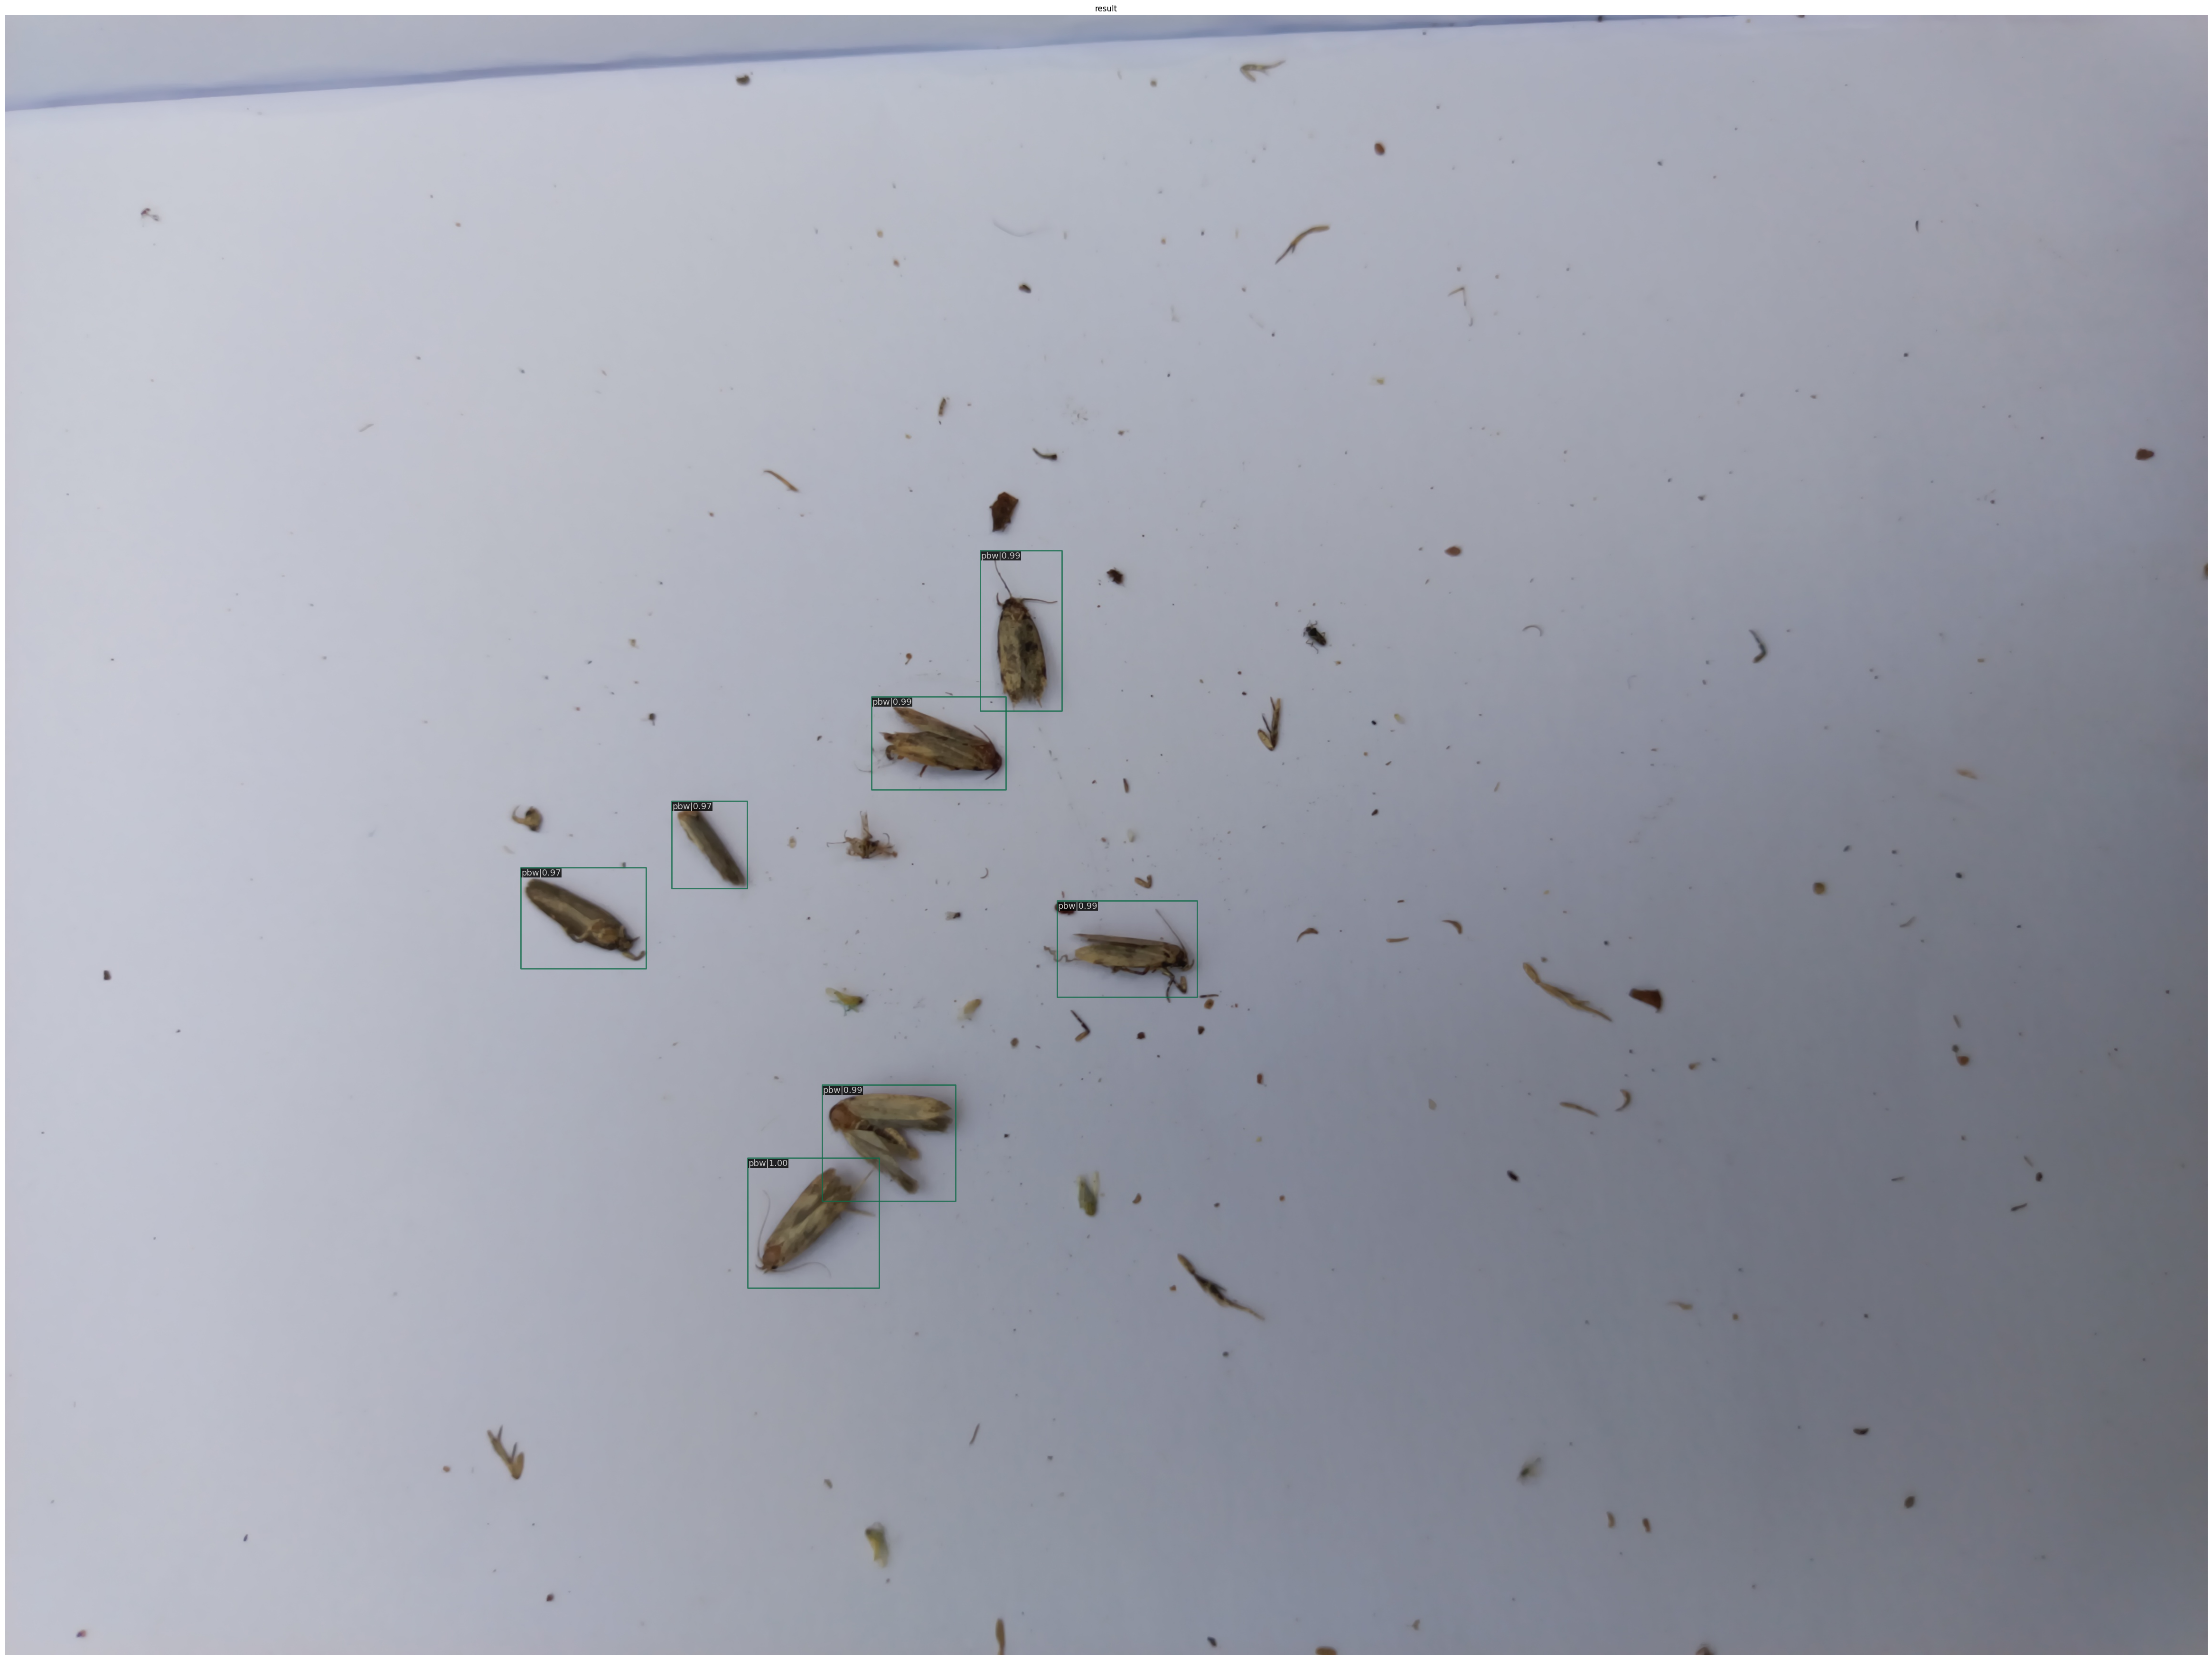

In [25]:
# visualization

img = mmcv.imread(os.path.join('///mnt/c/Personal/Competitions/Zindi/Wadhwani AI/data/images/', coco_data['images'][10]['file_name']))
config = mmcv.Config.fromfile(cfg)

# Build dataset
datasets = [build_dataset(config.data.train)]

# Build the detector
model = build_detector(config.model)
# Add an attribute for visualization convenience
model.CLASSES = datasets[0].CLASSES

model.cfg = config
show_result_pyplot(model, img, results[10], score_thr=0.5)

## Parse Results & Create Submission

In [26]:
out = dict()

for img_id, result in zip(ids, results):
    labels, scores, bboxes = [], [], []
    for class_id, bbox_results in enumerate(result):
        for bbox_result in bbox_results:
            if bbox_result[-1].item() >= 0.5:
                bboxes.append(bbox_result[:4].tolist())
                scores.append(bbox_result[-1].item())
                labels.append(class_id)
    
    result_df = pd.DataFrame(dict(labels=labels, bboxes=bboxes, scores=scores))
    out_temp = result_df['labels'].value_counts().to_dict()
    
    img_idx = img_id.split('.')[0]
    out[f'{img_idx}_abw'],out[f'{img_idx}_pbw'] = 0,0
    
    for k,v in out_temp.items():
        if k == 0: out[f'{img_idx}_abw'] += out_temp[k]
        if k == 1: out[f'{img_idx}_pbw'] += out_temp[k] 

In [27]:
out_df = pd.DataFrame.from_dict(out,orient='index').reset_index()
out_df.rename(columns={'index':'image_id_worm',0:'number_of_worms'},inplace=True)
out_df.head()

image_id_worm  number_of_worms
0  id_00332970f80fa9a47a39516d_abw                4
1  id_00332970f80fa9a47a39516d_pbw                0
2  id_0035981bc3ae42eb5b57a317_abw                0
3  id_0035981bc3ae42eb5b57a317_pbw               20
4  id_005102f664b820f778291dee_abw                9

In [28]:
submit = pd.merge(subm[['image_id_worm']],out_df,on='image_id_worm',how='left')
submit.head()

image_id_worm  number_of_worms
0  id_00332970f80fa9a47a39516d_abw                4
1  id_00332970f80fa9a47a39516d_pbw                0
2  id_0035981bc3ae42eb5b57a317_abw                0
3  id_0035981bc3ae42eb5b57a317_pbw               20
4  id_005102f664b820f778291dee_abw                9

In [29]:
submit.to_csv('///mnt/c/Personal/Competitions/Zindi/Wadhwani AI/runs/mmdet/runs/Exp001/fold0/submit_test_fold0.csv',index=False)